In [1]:
%%HTML 
<style>
    .tabella, .armi {
        width:100%;
        overflow: auto; 
        display: block;
        max-height: 600px; 
        position: relative;
        border: 1px solid black;
        border-collapse:collapse;
        margin:0 auto;
    }
    .tabella thead th {
        background-color: rgb(231, 179, 83);
        border: 1px solid black !important;
    }
    .tabella td, .armi td {background-color: rgb(239, 240, 215); color:black; border: 1px solid black !important; }
    .tabella tbody th, .armi tbody th {background-color: rgb(235, 221, 134); color:black; border: 1px solid black !important;}
    
    .armi thead th:nth-child(1),
    .armi thead th:nth-child(2),
    .armi thead th:nth-child(3) {
        z-index:1;
        background-color: rgb(231, 179, 83) !important;
        border: 1px solid black !important;
    }
    .armi thead th:nth-child(n+4):nth-child(-n+8) {
        z-index:1;
        background-color: rgb(200, 180, 255) !important;
        border: 1px solid black !important;
    }
    .armi thead th:nth-child(n+9):nth-child(-n+13) {
        z-index:1;
        background-color: rgb(180, 255, 200) !important;
        border: 1px solid black !important;
    }
    .armi thead th:nth-child(n+14):nth-child(-n+18) {
        z-index:1;
        background-color: rgb(241, 143, 143) !important;
        border: 1px solid black !important;
    }
</style>



# Analisi delle armi di DarkSouls3 

by Marco Venir 

# Premesse

Dark Souls 3 é un RPG in cui il giocatore accumula oggetti e migliora le proprie statistiche per sconfiggere dei nemici.

Questa analisi si focalizza sulle armi.

# Personaggio
https://darksouls3-italia.wiki.fextralife.com/Statistiche

Ogni personaggio possiede 9 attributi: 

Vitalità, Armonizzazione, Tempra, Vigore, **Forza**, **Destrezza**, **Intelligenza**, **Fede**, **Fortuna**

Di queste ci interessano in particolare quelle in grassetto, che servono a calcolare determinati tipi di danno che le armi possono causare.

# Armi 
https://darksouls3-italia.wiki.fextralife.com/Armi

Ogni arma possiede 5 parametri danno base:
fisico, magico, fuoco, elettrico, oscuro.

Questi 5 parametri poi possono aumentare in base al livello di **Scaling** dell'arma e al livello degli attributi del personaggio.

**Scaling** : un'arma puó aumentare determinati tipi di danno in base al livello di scaling per quel danno e al livello dell'attributo corrispondente.

Le armi possono essere infuse con delle gemme, ció consente di aggiungere dei danni di base o di incrementare quelli giá presenti.

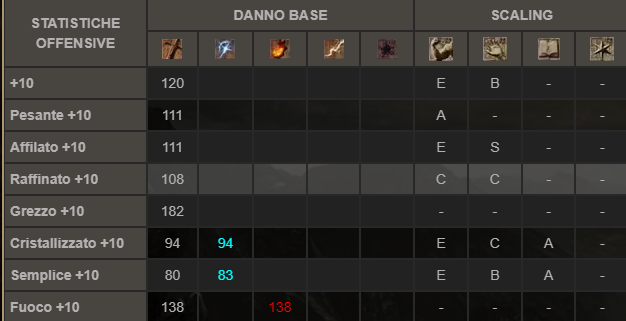

In [1]:
from IPython.display import Image

# Visualizza l'immagine inline
Image(filename='EsempioArma.png')

# Domande di partenza 
1.  Quali sono le armi piú forti del gioco? Come dipendono dalle statistiche del personaggio?
2.  Quanto é importante assegnare correttamente le statistiche? Quanto danno si perde assegnandole casualmente? 
3.  Che tipo di infusioni rendono le armi piú potenti?
4.  Ci sono armi che rimangono valide indipendentemente dal tipo di infusione?


<style>
div.dataframe {
    overflow-x: auto; /* Abilita lo scorrimento orizzontale */
    white-space: nowrap; /* Evita il ritorno a capo nelle celle della tabella */
}

table.dataframe {
    width: 100%; /* Imposta la larghezza della tabella al 100% */
    display: block; /* Rende la tabella un elemento a blocco per l'overflow */
}
</style>

<style>
div.dataframe {
    overflow-x: auto; /* Abilita lo scorrimento orizzontale */
    white-space: nowrap; /* Evita il ritorno a capo nelle celle della tabella */
    width: 100%; /* Imposta la larghezza della tabella al 100% */
}

table.dataframe {
    display: block; /* Rende la tabella un elemento a blocco per l'overflow */
    width: 100%; /* Imposta la larghezza della tabella al 100% */
    overflow-x: auto; /* Abilita lo scorrimento orizzontale */
}
</style>

# Illustrazione dei DataSet 

https://blog.mugenmonkey.com/2016/07/22/how-to-calculate-ar.html
https://docs.google.com/spreadsheets/d/1nGXbJ5DEaWCtXHhj46Wws4HM0KkV85nyczJemqmtDF8/edit?gid=0#gid=0


In [12]:
import pandas as pd

armi = pd.read_csv('CSV/DS3_weapons.csv', encoding='utf8')
curveSaturazione = pd.read_csv('CSV/DS3_saturation_curves.csv', encoding='utf8')

# print(armi.to_html())

armi = armi.style.set_table_attributes('class="armi"')
display(armi) 


In [10]:
import pandas as pd
curveSaturazione = pd.read_csv('CSV/DS3_saturation_curves.csv', encoding='utf8')

curveSaturazione = curveSaturazione.style.set_table_attributes('class="tabella"')
display(curveSaturazione) 

# Categorie di personaggio 

All'interno del gioco la distribuzione delle statistiche con l'aumento del livello dipende dalle scelte del giocatore. In questa analisi confronteremo 2 tipi di build:


1. Il personaggio ottimale : statistiche assegnate nel miglior modo possibile. 
2. Il personaggio casuale : statistiche assegnate casualmente

Per i confronti sulla stessa arma useremo delle build con ugual numero di livelli. 

In [64]:
import numpy as np 
import pandas as pd 
import itertools

personaggi = pd.DataFrame(columns=['Categoria', 'Str', 'Dex', 'Int', 'Faith', 'Luck'])

# ci saranno 5 entry con 1 statistica a 300 e le altre a 0, con 2 a 150 e 3 a 0 sono 5!/(3!2!)=10 e uguale con 3 a 100 e 2 a 0 = 10

def permutazioni(lista) :
    return list(itertools.permutations(lista))

def aggiungiCategoria(permutazioni, categoria):
    return [[categoria] + list(p) for p in permutazioni]
    
def popolaPersonaggiStd() : 
    max1 = [100,0,0,0,0]
    max2 = [100,100,0,0,0]
    max3 = [100,100,100,0,0]
    max4 = [100,100,100,100,0]
    dati = aggiungiCategoria(permutazioni(max1)+permutazioni(max2)+permutazioni(max3)+permutazioni(max4), 'Standard')
    popolamento = pd.DataFrame(dati, columns=personaggi.columns)
    return popolamento 

def generaListaRnd(somma, lunghezza):
    i=0
    lista = [0]*4+[1]
    while i+1<lunghezza:
        n = np.random.randint(0, somma) # genero numero casuale 
        lista[i]+=n # aggiungo numero in lista 
        somma-=n # tolgo numero dal totale
        i+=1
    lista[i]=somma # metto il totale rimanente come ultimo numero
    return lista

def generaDati(volume, totaleStat) : 
    dati = []
    while volume>0:
        dati.append(generaListaRnd(totaleStat,5))
        volume-=1
    return dati
    


personaggiStd = popolaPersonaggiStd()

personaggiRnd = pd.concat([pd.DataFrame(aggiungiCategoria(generaDati(125, 100), 'Random100'), columns=personaggi.columns), pd.DataFrame(aggiungiCategoria(generaDati(125, 200), 'Random200'), columns=personaggi.columns), pd.DataFrame(aggiungiCategoria(generaDati(125, 300), 'Random300'), columns=personaggi.columns), pd.DataFrame(aggiungiCategoria(generaDati(125, 400), 'Random400'), columns=personaggi.columns)])

personaggi = pd.concat([personaggiStd, personaggiRnd], axis=0).drop_duplicates().reset_index(drop=True)
# personaggi.to_csv('./CSV/DS3_personaggi.csv', index=False)
personaggi = personaggi.style.set_table_attributes('class="tabella"')

display(personaggi)


# Formula per calcolare il danno Totale delle armi 

AR = Base Physical + Base Magic + Base Fire + Base Lightning + Base Dark +
Base Physical * (Strength Scaling Coefficient * Physical Saturation 
                + Dex Scaling Coefficient * Physical Saturation
                + Luck Scaling Coefficient * Physical Saturation
                + Faith Scaling Coefficient * Physical Saturation)
                + Base Magic * (Intelligence Scaling Coefficient * Magic Saturation)
                + Base Fire * (Intelligence Scaling Coefficient * Fire Saturation
                + Faith Scaling Coefficient * Fire Saturation)
                + Base Lightning * (Faith Scaling Coefficient * Lightning Saturation)
                + Base Dark * (Intelligence Scaling Coefficient * Dark Saturation
                + Faith Scaling Coefficient * Dark Saturation)


# Calcolo del danno massimo per ogni arma

1. **Build Ottimale** : 
    identifico i tipi di danno per cui l'arma ha un livello di scaling diverso da 0 e associo all'arma la build piú adatta estraendola da quelle generate precedentemente. 

2. **Build Casuale** : 
    estraggo casualmente una build random da quelle generate che abbia il totale di livelli corrispondente alla build ottimale scelta. 
    
Dopo aver scelto le build con le statistiche procedo al calcolo del danno massimo. 

## 1. Quali sono le armi piú forti del gioco? Come dipendono dalle statistiche del personaggio?

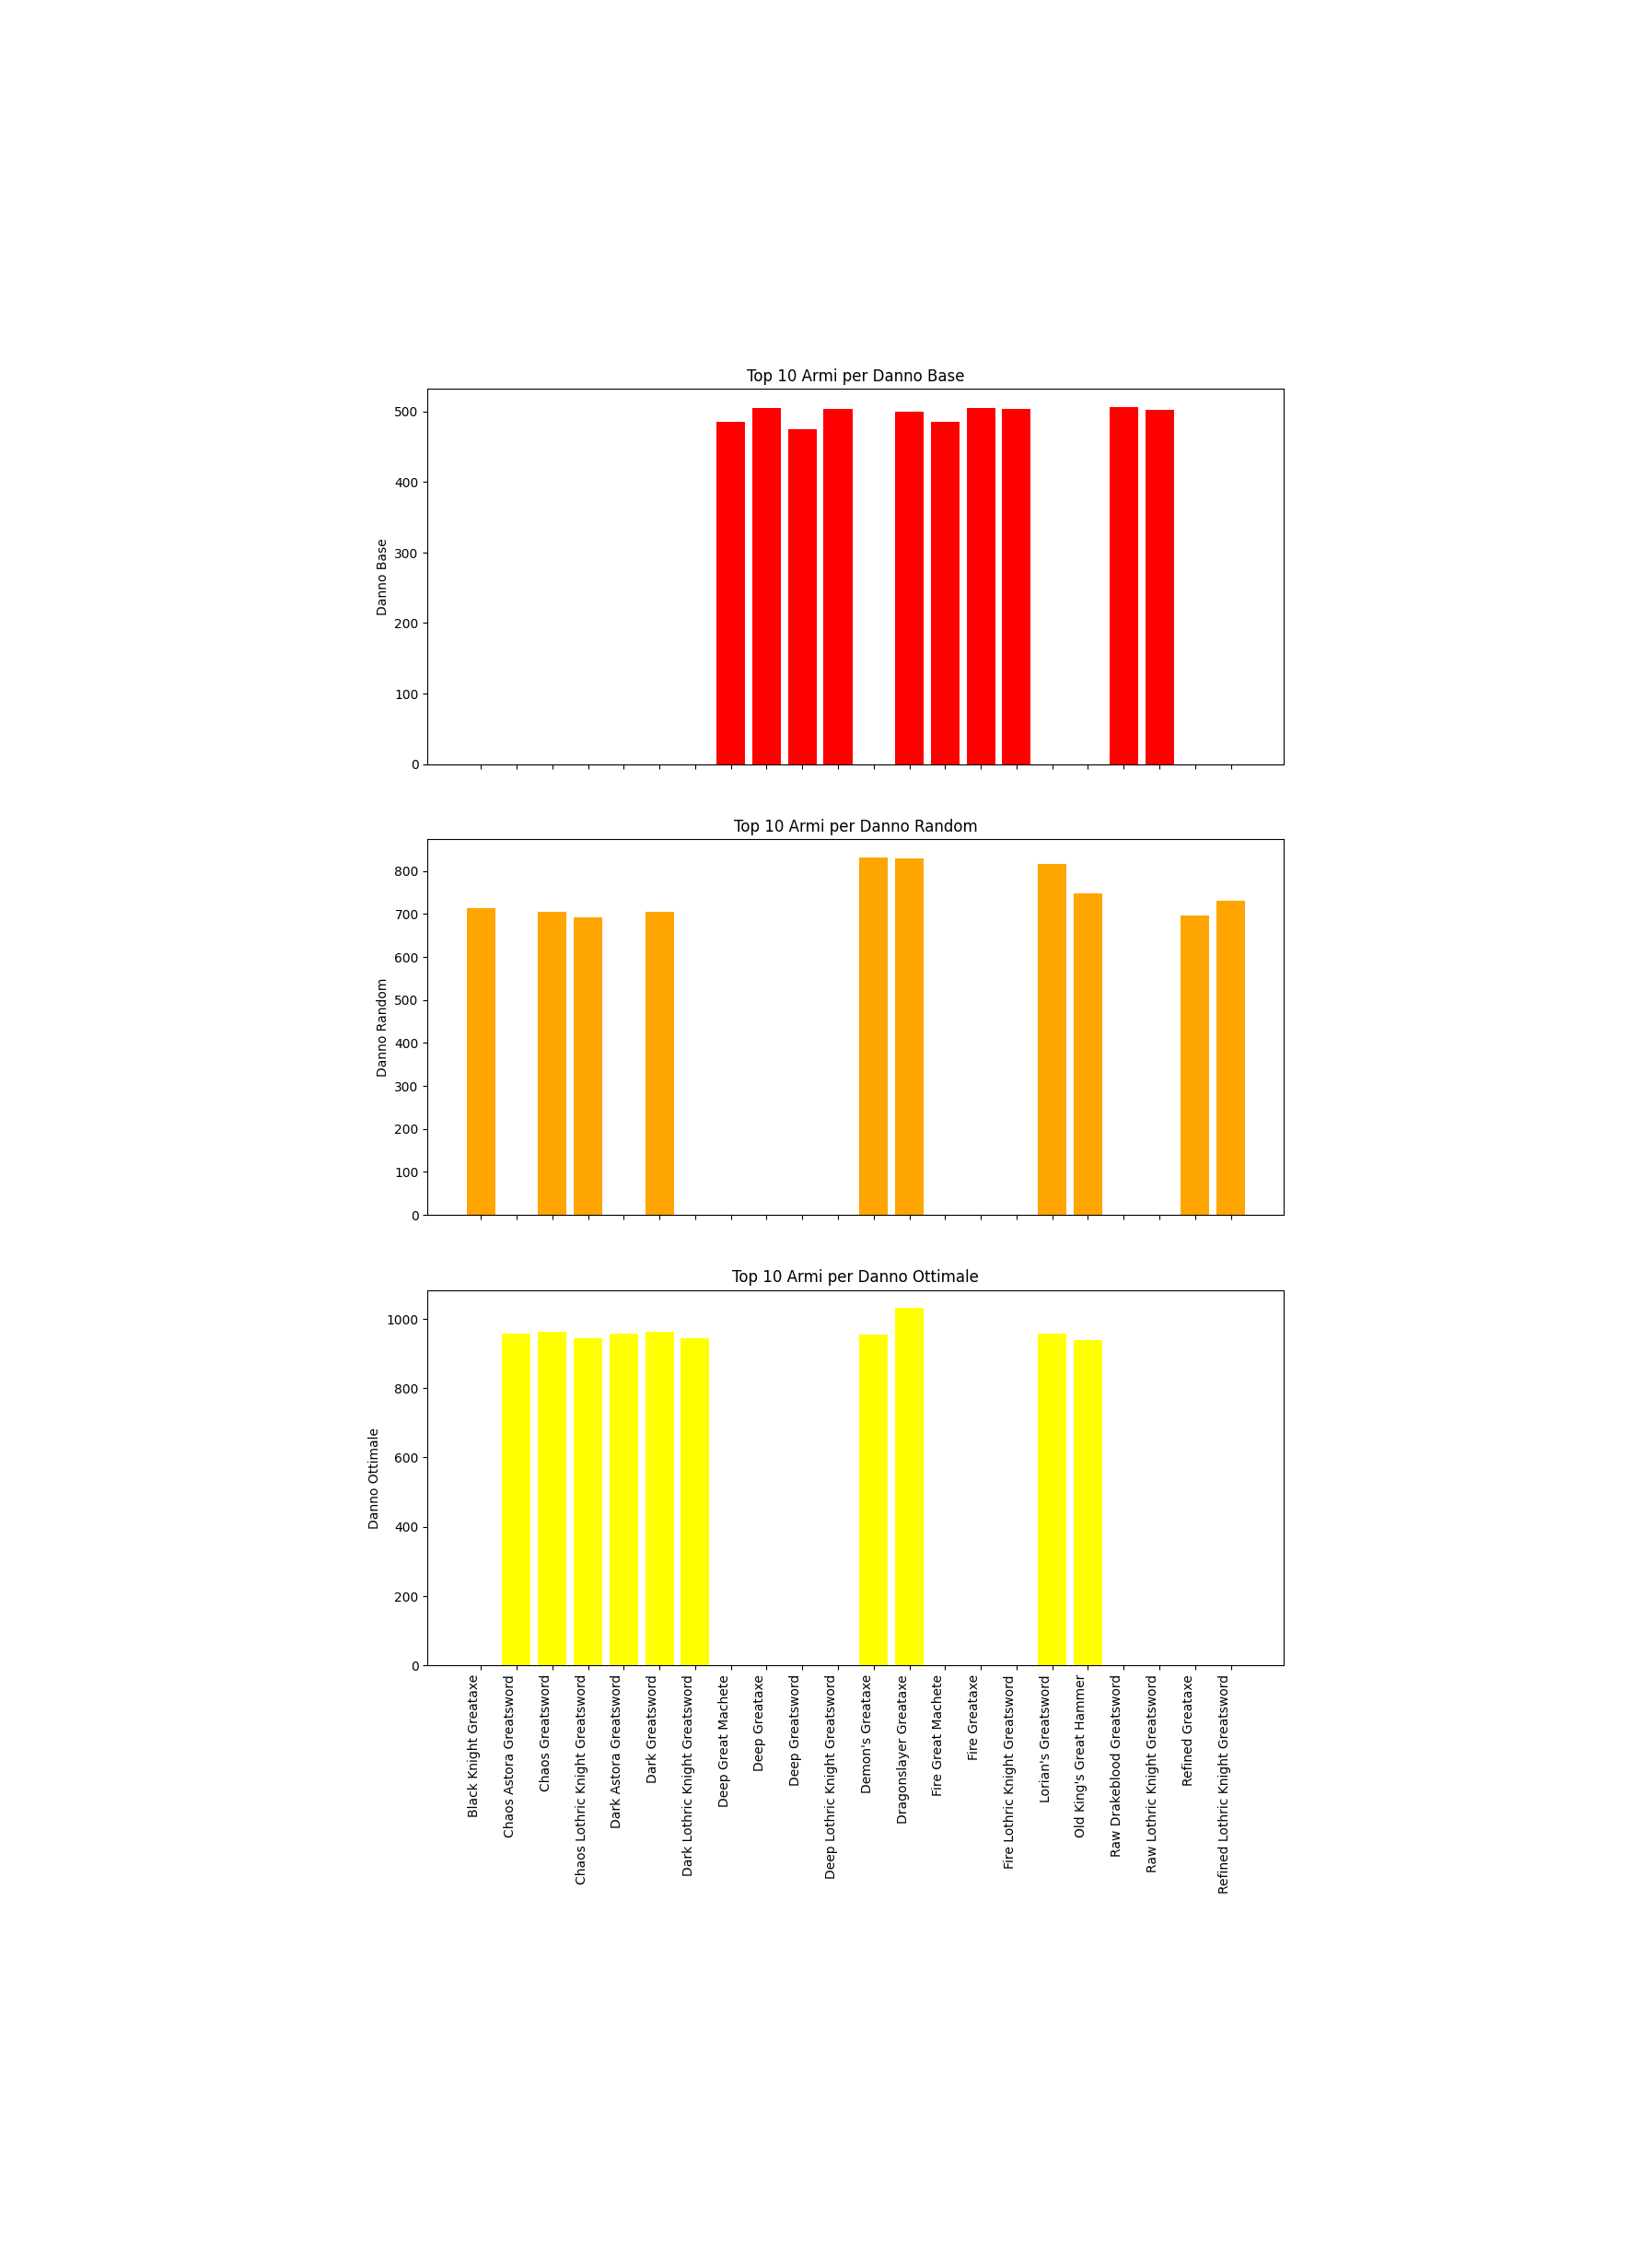

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


armi = pd.read_csv('CSV/DS3_weapons.csv', encoding='utf8')
personaggi = pd.read_csv('CSV/DS3_personaggi.csv', encoding='utf8')
curveSaturazione = pd.read_csv('CSV/DS3_saturation_curves.csv', encoding='utf8')

#genero 32 combinazioni di 0 1 su 5 valori e filtro le armi in base ai parametri di scaling

def filtraScaling(armi):
    # Nomi delle colonne di statistiche
    stats = ['Str (SC)', 'Dex (SC)', 'Int (SC)', 'Faith (SC)', 'Luck (SC)']

    combinazioni = [[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1], [1,1,0,0,0], [1,0,1,0,0], [1,0,0,1,0], [1,0,0,0,1], [0,1,1,0,0], [0,1,0,1,0], [0,1,0,0,1], [0,0,1,1,0], [0,0,1,0,1], [0,0,0,1,1], [1,1,1,0,0], [1,1,0,1,0], [1,1,0,0,1], [1,0,1,1,0], [1,0,1,0,1], [1,0,0,1,1], [0,1,1,1,0], [0,1,1,0,1], [0,1,0,1,1], [0,0,1,1,1], [1,1,1,1,0], [1,1,1,0,1], [1,1,0,1,1], [1,0,1,1,1], [0,1,1,1,1], [1,1,1,1,1], [0,0,0,0,0]]
    
    # Itera attraverso le combinazioni e genera i DataFrame Scaling0, Scaling1, ... Scaling31
    for i, combinazione in enumerate(combinazioni): # enumerate ritorna le combinazioni con indice 0,1,2 associato a i 

        condizione = True 
        # condizione maschera booleana, quando faccio True&= Serie condizione diventa una colonna booleana lunga quanto la serie
        for j in range(5):
            condizione &= (armi[stats[j]] != 0 if combinazione[j] else armi[stats[j]] == 0)

        # Genera il DataFrame con il nome ScalingX
        globals()[f'Scaling{i}'] = armi[condizione]

filtraScaling(armi)
 
# da 0 a 29 sono come le build dei personaggi, 30 é per quelli con tutti gli Sclaing a 0 e 31 per quelli con tutti gli Scaling (non ce n'é)

#A ogni Scaling aggiungo una colonna con l'indice della build personaggio da associare 

def aggiungiIndice() :
    for i in range(32) :
        df = globals().get(f'Scaling{i}')
        if df is not None:
            df_copy = df.copy()
            df_copy['Indice Build'] = i
            globals()[f'Scaling{i}'] = df_copy

aggiungiIndice() 

#unisco insieme tutti gli Scaling

def unisci_scaling():
    # Lista per contenere tutti i DataFrame
    tutti_scaling = []
    
    # Aggiungi ogni DataFrame 'ScalingX' alla lista
    for i in range(32):
        df = globals().get(f'Scaling{i}')
        if df is not None:
            tutti_scaling.append(df)
    
    # Unisci tutti i DataFrame in uno solo
    risultato = pd.concat(tutti_scaling, ignore_index=True)
    
    return risultato


armiIndiciOttimali = unisci_scaling()

personaggi['Indice Build'] = personaggi.index
armiOttimali = pd.merge(armiIndiciOttimali, personaggi, on='Indice Build')

# per gli indici 31 vanno bene build casuali, tanto non scalano in nessun modo, ricordiamo che non esistono indici 30 perché le armi hanno max 4 scaling, non 5

#procediamo ora al calcolo del danno totale delle armi con le build ottimali 
def trasformaInPercentuali(riga) : 
    riga['Str (SC)'] /=100
    riga['Dex (SC)'] /=100
    riga['Int (SC)'] /=100
    riga['Faith (SC)'] /=100
    riga['Luck (SC)'] /=100
    return riga 

def riformula(stats):
    return [f'Level {int(min(stat, 99))}' for stat in stats]
    
def trovaSaturazionie(sci, stat) : 
    saturazione= int(curveSaturazione.loc[curveSaturazione['Curve Index'] == sci, str(stat)].values[0])/100
    return saturazione
    
def dannoTotale(riga) :  
    sc = [riga['Str (SC)'],riga['Dex (SC)'], riga['Int (SC)'], riga['Faith (SC)'], riga['Luck (SC)']]
    bd = [riga['Physical (BD)'],riga['Magic (BD)'],riga['Fire (BD)'],riga['Lightning (BD)'],riga['Dark (BD)']]
    sci = [riga['Physical (SCI)'],riga['Magic (SCI)'],riga['Fire (SCI)'],riga['Lightning (SCI)'],riga['Dark (SCI)']]
    stat = [riga['Str'],riga['Dex'], riga['Int'], riga['Faith'], riga['Luck']]
    
    stat = riformula(stat) 
    riga['Str'] = stat[0]
    riga['Dex']= stat[1]
    riga['Int'] = stat[2]
    riga['Faith'] = stat[3]
    riga['Luck']= stat[4]
    
    dannoFisico = bd[0] + bd[0]*(sc[0]*trovaSaturazionie(sci[0], stat[0]) + sc[1]*trovaSaturazionie(sci[0], stat[1]) + sc[3]*trovaSaturazionie(sci[0], stat[3]) + sc[4]*trovaSaturazionie(sci[0], stat[4]))
    dannoMagico = bd[1] + bd[1]*(sc[2]*trovaSaturazionie(sci[1], stat[2]))
    dannoFuoco = bd[2] + bd[2]*(sc[2]*trovaSaturazionie(sci[2], stat[2]) + sc[3]*trovaSaturazionie(sci[2], stat[3]))
    dannoFulmine = bd[3] + bd[3]*(sc[3]*trovaSaturazionie(sci[3], stat[3]))
    dannoOscuro = bd[4] + bd[4]*(sc[2]*trovaSaturazionie(sci[4], stat[2]) + sc[3]*trovaSaturazionie(sci[4], stat[3]))
    dannoTotale = dannoFisico + dannoMagico + dannoFuoco + dannoFulmine + dannoOscuro 

    riga['Danno Base'] = sum(bd) 
    riga['Danno Totale'] = dannoTotale
    return riga



armiOttimali = armiOttimali.apply(trasformaInPercentuali, axis=1).apply(dannoTotale, axis=1) 
# armiOttimali.to_csv('./CSV/DS3_armiOttimali.csv', index=False)


#ora genero la tabella delle armi con build casuali, per farlo devo assicurarmi che per la stessa arma il totale delle statistiche corrisponda
#sfrutto gli indici delle build ottimali, da 0 a 4 =100 livelli, da 5 a 14 200, da 15 a 24 300, da 25 a 29 400, 30,31 non interessano


#trovo le medie delle statistiche per le fasce Random100, Random200, Random300 ... e le assegno in base agli indici. 

medieBuildCasuali = personaggi.groupby(['Categoria']).mean()
medieBuildCasuali['Indice Build'] = [0,1,2,3,4]

#in questo modo ci sono 4 build con parametri random medi da associare alle armi in base allo scaling

#funzione che mappa indici ottimali nei 4 indici random per assegnare le build

def cambiaInRandom(indice) :
    if (indice >=0 and indice<5): 
        return 0
    elif (indice >=5 and indice<15): 
        return 1
    elif (indice >=15 and indice<25): 
        return 2
    else : 
        return 3


armiIndiciRandom = armiIndiciOttimali.copy()
armiIndiciRandom['Indice Build'] = armiIndiciRandom['Indice Build'].apply(cambiaInRandom)
armiRandom = pd.merge(armiIndiciRandom, medieBuildCasuali, on='Indice Build')
armiRandom = armiRandom.apply(trasformaInPercentuali, axis=1).apply(dannoTotale, axis=1)

armiOttimali = armiOttimali.rename(columns={'Danno Totale': 'Danno Ottimale'})
armiRandom = armiRandom.rename(columns={'Danno Totale': 'Danno Random'})
armiOttimali = armiOttimali[['Weapon Name', 'Weapon Type',  'Danno Base', 'Danno Ottimale']]
armiRandom = armiRandom[['Weapon Name', 'Danno Random']]

armi = pd.merge(armiOttimali, armiRandom, on='Weapon Name')

#grafici e risposte 

#risposta alla seconda domanda. 
armi['Differenza'] = armi['Danno Ottimale'] - armi['Danno Random']
armi['Percentuale'] = armi['Differenza']/armi['Danno Ottimale']

media=armi['Percentuale'].mean()
#print(media) ## media del 11% 
#armi.to_csv('./CSV/DS3_armiOttimali.csv', index=False)

############### GRAFICO 1: 

top_base = armi[['Weapon Name', 'Danno Base']].sort_values(by='Danno Base', ascending=False).head(10)
top_opt = armi[['Weapon Name', 'Danno Ottimale']].sort_values(by='Danno Ottimale', ascending=False).head(10)
top_rnd = armi[['Weapon Name', 'Danno Random']].sort_values(by='Danno Random', ascending=False).head(10)


top_weapons = pd.merge(top_base, top_opt, on='Weapon Name', how='outer', suffixes=('_Base', '_Opt'))
top_weapons = pd.merge(top_weapons, top_rnd, on='Weapon Name', how='outer')
top_weapons.rename(columns={'Danno Random': 'Danno_Random'}, inplace=True)


fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

axes[0].bar(top_weapons['Weapon Name'], top_weapons['Danno Base'], color='red')
axes[0].set_title('Top 10 Armi per Danno Base')
axes[0].set_ylabel('Danno Base')

axes[1].bar(top_weapons['Weapon Name'], top_weapons['Danno_Random'], color='orange')
axes[1].set_title('Top 10 Armi per Danno Random')
axes[1].set_ylabel('Danno Random')

axes[2].bar(top_weapons['Weapon Name'], top_weapons['Danno Ottimale'], color='yellow')
axes[2].set_title('Top 10 Armi per Danno Ottimale')
axes[2].set_ylabel('Danno Ottimale')

plt.xticks(rotation=90, ha='right')

fig.savefig('topArmi.png', bbox_inches="tight", pad_inches=4, format='png', dpi=100)  
plt.close(fig)

############### GRAFICO 2: Differenza tra i diversi tipi di danni sulle stesse armi  

armi = armi.sort_values(by='Danno Ottimale') 

fig, ax = plt.subplots(figsize=(15, 10))
ax.yaxis.set_major_locator(plt.MultipleLocator(100))

ax.bar(armi['Weapon Name'], armi['Danno Ottimale'], label='Danno Ottimale', color='yellow', width = 1.0)
ax.bar(armi['Weapon Name'], armi['Danno Random'], label='Danno Random', color='orange', width = 1.0)
ax.bar(armi['Weapon Name'], armi['Danno Base'], label='Danno Base', color='red', width = 1.0)

ax.set_xlabel('Weapon Name')
ax.set_ylabel('Danno')
ax.set_title('Distribuzione dei danni di tutte le armi')
ax.legend()
plt.tight_layout()
ax.set_xticks([])

fig.savefig('tutteArmi.png', format='png', dpi=100)  # Cambia il nome e formato come desideri
plt.close(fig)

Image(filename='topArmi.png')

## Risposta 

Tra tutte le armi ne sono state scelte 22, ognuna delle quali rientra nelle prime 10 in almeno una categoria di danno.
La Dragonslayer GreatAxe é la piú forte arma con build ottimale ed é presente in tutti e 3 i grafici, dimostrando di essere molto forte in ogni contesto.


## 2. Quanto é importante assegnare correttamente le statistiche? Quanto danno si perde assegnandole casualmente?

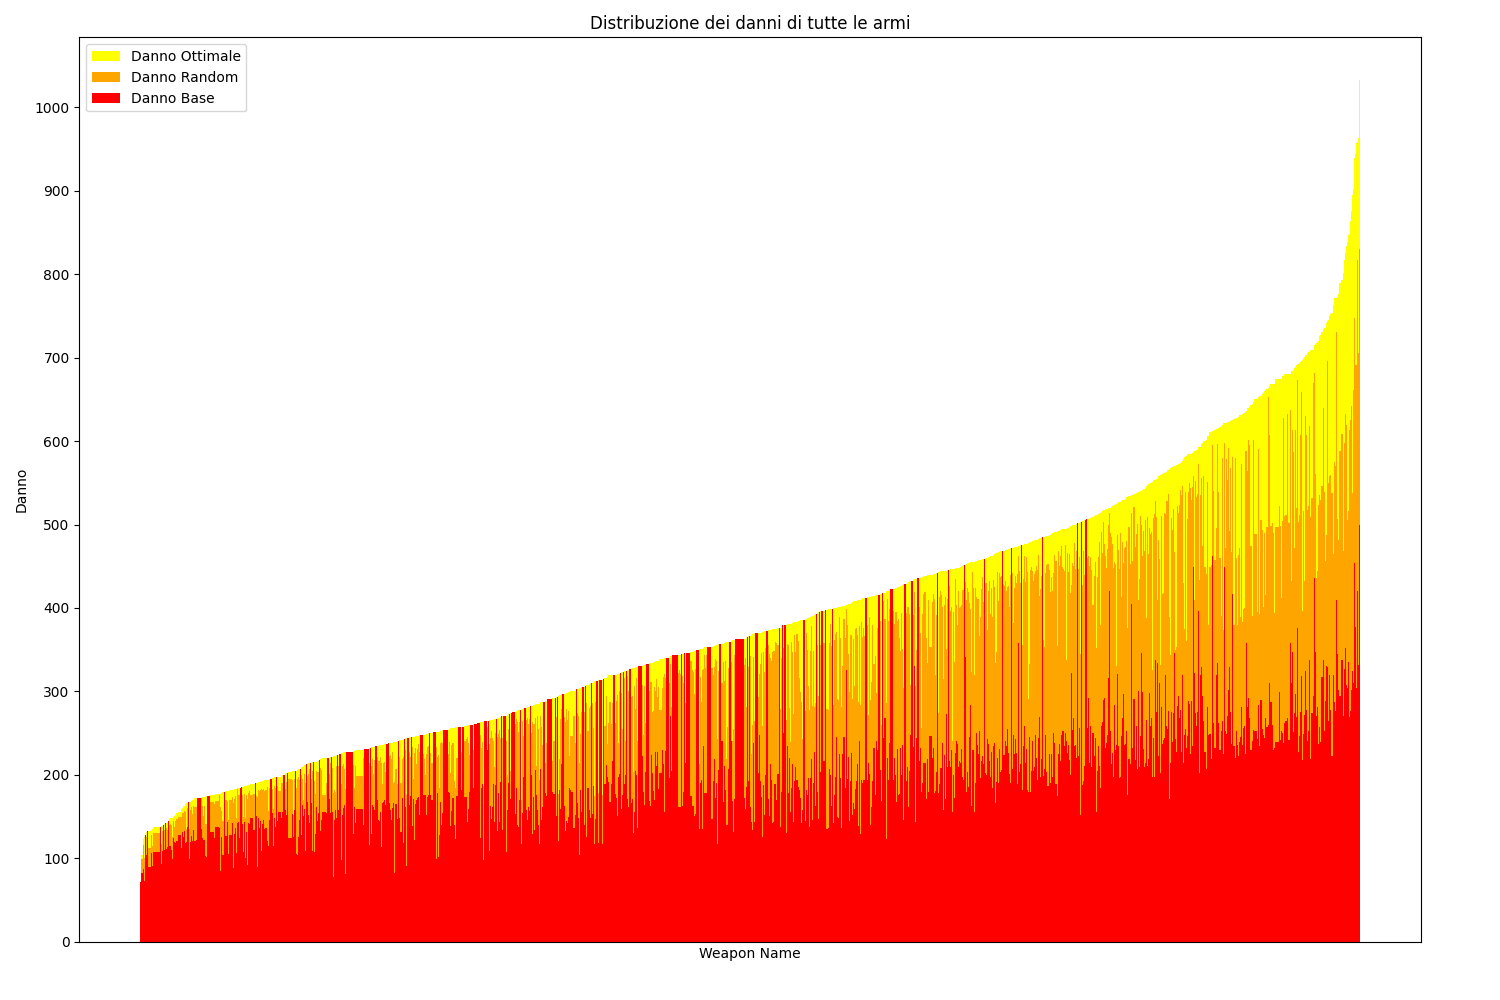

In [3]:
from IPython.display import Image

Image(filename='tutteArmi.png')

## Risposta 

Vediamo il confronto tra 2 modi di assegnare le statistiche. La differenza maggiore riguarda le armi piú forti, che si presume siano acquisite verso la fine del gioco quando il giocatore ha accumulato molti livelli. 

In generale la differenza non é altissima e quindi non stravolge le meccaniche di gioco (perdo in media l'11% dei danni). 

Notiamo anche come alcune armi abbiano il tetto massimo come danno di base, queste sono le armi che non hanno fattori di scaling e quindi la cui potenza é indipendente dalle statistiche assegnate. 

# Infusioni 


Le infusioni possono essere dei seguenti tipi: 
Normal, Heavy, Sharp, Refined, Simple, Crystal, Fire, Chaos, Lightning, Deep, Dark, Poison, Blood, Raw, Blessed, Hollow

Ogni infusione scala in base a determinati parametri e statistiche, quindi a paritá di statistiche ci si aspetta di ottenere danni diversi con infusioni diverse. 



In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


armi = pd.read_csv('CSV/DS3_armiOttimali.csv', encoding='utf8')
infusioni = ['Normal', 'Heavy', 'Sharp', 'Refined', 'Simple', 'Crystal', 'Fire', 'Chaos', 'Lightning', 'Deep', 'Dark', 'Poison', 'Blood', 'Raw', 'Blessed', 'Hollow']
# faccio una tabella per ogni infusione
# confronto del danno medio tra le varie infusioni 
# prendere le armi piú potenti e confrontare i vari tipi di infusioni... 

def get_infusion(weapon_name):
    for infusion in infusioni:
        if (' ' in weapon_name) & (infusion == weapon_name.split(' ')[0]) :
            return infusion
    return 'Normal'  

armi['Infusion Type'] = armi['Weapon Name'].apply(get_infusion)

dataframes = {infusione: pd.DataFrame(columns=armi.columns) for infusione in infusioni}

for _, row in armi.iterrows():
    infusione = row['Infusion Type']
    if infusione is not None and not row.isnull().any() : 
        dataframes[infusione] = pd.concat([dataframes[infusione].astype(pd.DataFrame([row]).dtypes), pd.DataFrame([row])], ignore_index=True)

def rimuoviInfusione(nome) : 
    infusion = nome.split(' ')[0] + ' ' 
    return nome.split(infusion)[1] 

infusions = dataframes['Normal'][['Weapon Name']]

for infusione in infusioni : 
    if infusione != 'Normal' : 
        dataframes[infusione]['Weapon Name'] = dataframes[infusione]['Weapon Name'].apply(rimuoviInfusione) 
    dataframes[infusione] = dataframes[infusione].sort_values(by='Danno Ottimale', ascending=False, ignore_index=True)
    dataframes[infusione] = dataframes[infusione][['Weapon Name', 'Danno Ottimale']]
    dataframes[infusione] = dataframes[infusione].rename(columns={'Danno Ottimale' : infusione} ) 
    infusions = infusions.merge(dataframes[infusione], on='Weapon Name') 
    
global_mean = infusions.loc[:, infusions.columns != 'Weapon Name'].values.mean() 
infusions['Media'] = infusions.loc[:, infusions.columns != 'Weapon Name'].mean(axis=1)
infusions['Miglioramento Medio'] = infusions.loc[:, infusions.columns != 'Weapon Name'].mean(axis=1) - infusions['Normal'] 


#infusions = infusions.sort_values(by='Miglioramento Medio') 
#infusions = infusions.style.set_table_attributes('class="tabella"')
#display(infusions) 
#uso i 16 dataframe per il grafico 3, infusions per il grafico 4 
#infusions contiene tutte le armi che hanno tutte le infusioni disponibili, le altre sono escluse, non rilevanti per l'analisi

# GRAFICO 3:: 16 diverse infusioni a confronto 
fig, axes = plt.subplots(1, 16, figsize=(20, 5), sharey=True)

for i, col in enumerate(infusioni):
    axes[i].boxplot(infusions[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelsize=8)  
    axes[i].axhline(global_mean, color='red', linestyle='--', linewidth=1, label='Media complessiva' if i == 0 else "")  

axes[0].legend(loc='upper right', fontsize='small')

fig.savefig('BoxPlotInfusioni.png', format='png', dpi=100)
plt.close(fig)


# GRAFICO 4:: confronto del danno medio guadagnato o perso 
values = infusions['Miglioramento Medio'] 
x = range(len(values)) 
y = values  

fig, ax = plt.subplots(figsize=(10,6))
ax.hlines(0, xmin=0, xmax=len(values)-1, colors='blue', linestyles='--', linewidth=1)  
ax.scatter(range(len(values)), values, color='orange') 

highest_points = y.argsort()[-4:][::-1] 
lowest_points = y.argsort()[:4]         

for idx in highest_points:
    ax.scatter(x[idx], y[idx], color='green', s=100, edgecolor='black') 

for idx in lowest_points:
    ax.scatter(x[idx], y[idx], color='red', s=100, edgecolor='black')  

ax.set_xlabel('Armi')
ax.set_ylabel('Variazione Danno Media')
ax.grid(True, linestyle='--', alpha=0.5)  

fig.savefig('mediaInfusioni.png', format='png', dpi=100)  
plt.close(fig) 


# indago sui due outlayer di Raw 
#display(dataframes['Raw'].sort_values(by='Raw', ascending=False) )
#DrakeBlood GreatSword e Lothric Knight GreatSword 

#GreatSword hanno danno di base particolarmente elevato, che con l'infusione raw aumenta ulteriormente, inoltre queste 2 armi hanno anche altri tipi di danni base, che non vengono diminuiti nonostante la perdita di scaling 

## 3. Che tipo di infusioni rendono le armi piú potenti?

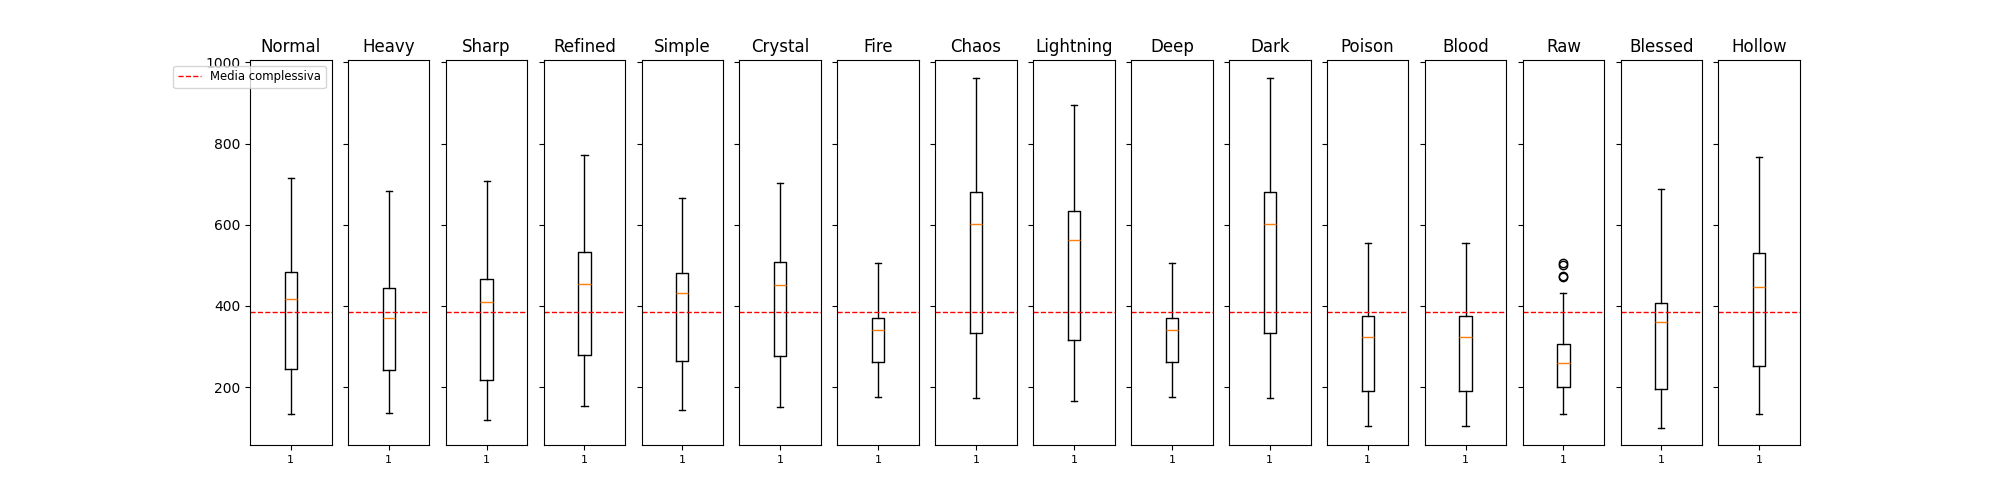

In [4]:
from IPython.display import Image

Image(filename='BoxPlotInfusioni.png')

## Risposta

Per ogni arma vengono confrontati tutti i tipi di danno corrispondenti alle varie infusioni.
Prevalgono nettamente le infusioni: Chaos, Dark, Lightning. 
Invece peggiorano le armi le infusioni: Fire, Deep, Poison, Blood e Raw.

Spiccano 2 valori outlayer nel grafico relativo all'infusione Raw: la DrakeBlood GreatSword e Lothric Knight GreatSword. 

In [10]:
import pandas as pd

armi = pd.read_csv('CSV/DS3_weapons.csv', encoding='utf8')
armi = armi[(armi['Weapon Name'] == 'Raw Drakeblood Greatsword') | (armi['Weapon Name'] == 'Raw Lothric Knight Greatsword') | (armi['Weapon Name'] == 'Drakeblood Greatsword') | (armi['Weapon Name'] == 'Lothric Knight Greatsword')] 

armi = armi.style.set_table_attributes('class="armi"')
display(armi) 

## 4. Ci sono armi che rimangono valide (o non valide) indipendentemente dal tipo di infusione?

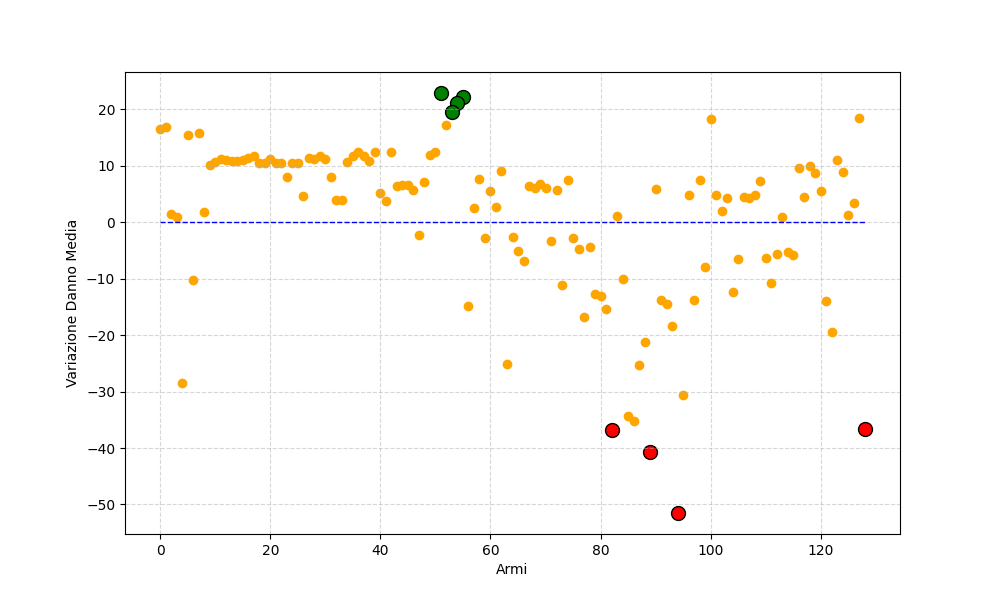

In [5]:
from IPython.display import Image


Image(filename='mediaInfusioni.png')

## Risposta

Ci sono varie armi che reagiscono bene a tutti i tipi di infusioni, tra queste spiccano: 
Dagger (+22.9), Harpe (+22.1), Rotten Ghru Dagger (+21.1), Parrying Dagger (+19.6) 
che hanno un guadagno medio di almeno 20 danni. 

Invece le infusioni sono particolarmente compromettenti per le armi: 
GreatAxe (-51.5), Drakeblood Greatsword (-40.7), Greatsword (-36.7), Saint Bident (-36.6).

# Conclusioni 

Assegnare correttamente le statistiche e saper infondere le proprie armi é utile per:
1. Massimizzare il danno delle armi.
2. Evitare di compromettere armi buone rendendole inutilizzabili.

Tuttavia la maggior parte delle armi rimane utilizzabile anche senza saperne sfruttare le caratteristiche, il che rende possibile un gameplay anche per i meno esperti.

Per quanto riguarda le infusioni, è essenziale fare scelte consapevoli. Come mostra il grafico, nelle fasi avanzate del gioco c’è il rischio che il danno delle armi diminuisca sensibilmente, quindi è fondamentale selezionare le infusioni corrette. 
